# Assignment 7 - DA5401 DAL Lab
### Name: Karan Kishore Roll Number: DA25D400

### 2. Tasks
#### Part A: Data preparation and Baseline

##### A.1: Load and Prepare Data

In [4]:
!pip install ucimlrepo

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, f1_score, roc_curve, auc, roc_auc_score, average_precision_score,
    RocCurveDisplay, PrecisionRecallDisplay
)
from sklearn.preprocessing import label_binarize
from itertools import cycle
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
train_df = pd.read_csv('sat.trn', delim_whitespace=True, header=None)
test_df = pd.read_csv('sat.tst', delim_whitespace=True, header=None)
print(f"Shape of training data: {train_df.shape}")
print(f"Shape of testing data: {test_df.shape}")

Shape of training data: (4435, 37)
Shape of testing data: (2000, 37)


/tmp/ipython-input-1818291775.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train_df = pd.read_csv('sat.trn', delim_whitespace=True, header=None)
/tmp/ipython-input-1818291775.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  test_df = pd.read_csv('sat.tst', delim_whitespace=True, header=None)


Class frequency in train data
{np.int64(1): np.int64(1072), np.int64(2): np.int64(479), np.int64(3): np.int64(961), np.int64(4): np.int64(415), np.int64(5): np.int64(470), np.int64(7): np.int64(1038)}
Class frequency in test data
{np.int64(1): np.int64(461), np.int64(2): np.int64(224), np.int64(3): np.int64(397), np.int64(4): np.int64(211), np.int64(5): np.int64(237), np.int64(7): np.int64(470)}


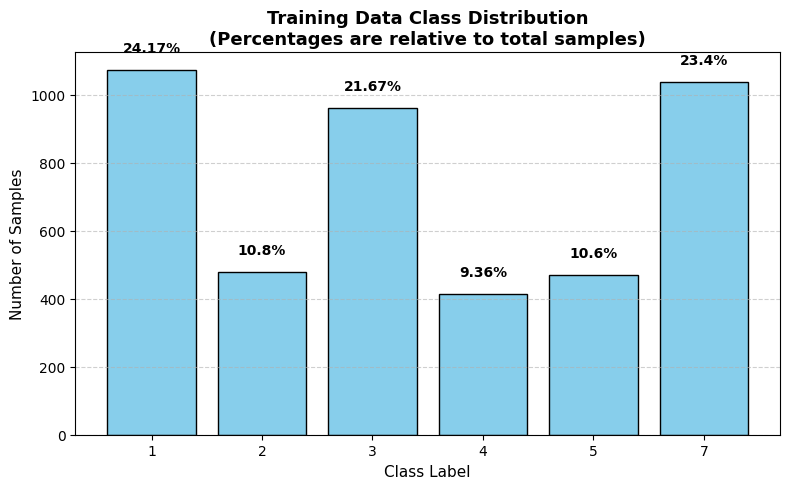

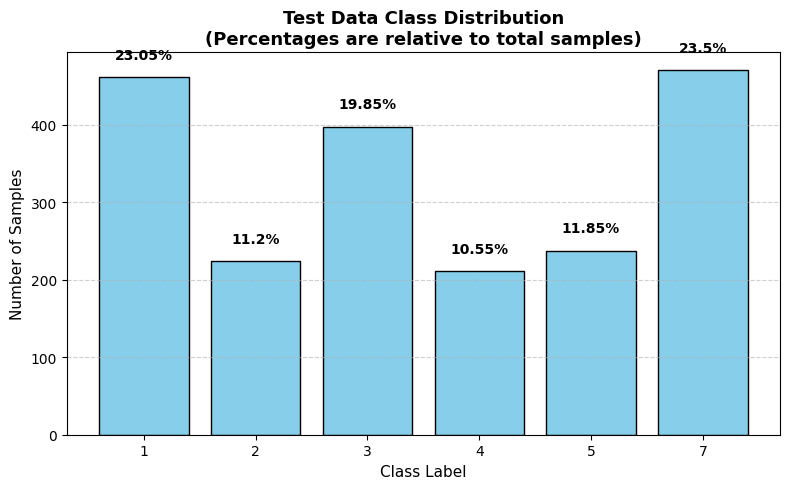

In [9]:
X_train = train_df.iloc[:, :-1].values
y_train = train_df.iloc[:,-1].values
X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Class frequency in train data")
uniq, cts = np.unique(y_train, return_counts=True)
print(dict(zip(uniq, cts)))
print("Class frequency in test data")
uniq_test, cts_test = np.unique(y_test, return_counts=True)
print(dict(zip(uniq_test, cts_test)))

# Assuming y_train and y_test are NumPy arrays
# (If they are Series, this works too)
def plot_class_distribution(y, title):
    # Count occurrences and convert to pandas Series for convenience
    counts = pd.Series(y).value_counts().sort_index()

    # Calculate percentages
    total = counts.sum()
    percentages = (counts / total * 100).round(2)

    # Plot
    fig, ax = plt.subplots(figsize=(8, 5))
    bars = ax.bar(counts.index.astype(str), counts.values, color='skyblue', edgecolor='black')

    # Add percentages above bars
    for bar, pct in zip(bars, percentages):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + total * 0.01,  # small offset
            f"{pct}%",
            ha='center', va='bottom', fontsize=10, fontweight='bold'
        )

    # Titles and labels
    ax.set_title(f"{title}\n(Percentages are relative to total samples)", fontsize=13, fontweight='bold')
    ax.set_xlabel("Class Label", fontsize=11)
    ax.set_ylabel("Number of Samples", fontsize=11)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Plot for both train and test sets
plot_class_distribution(y_train, "Training Data Class Distribution")
plot_class_distribution(y_test, "Test Data Class Distribution")


The description of the classes from the website are as follows:

Class Labels

| **Number** | **Class Description**               |
| :--------: | ----------------------------------- |
|    **1**   | Red soil                            |
|    **2**   | Cotton crop                         |
|    **3**   | Grey soil                           |
|    **4**   | Damp grey soil                      |
|    **5**   | Soil with vegetation stubble        |
|    **6**   | Mixture class *(all types present)* |
|    **7**   | Very damp grey soil                 |


We are asked to exclude the class 6 - (all types present) which is done by default when the import was done (maybe the dataset was cleansed already).

##### A.2: Train/Test split - The data is already available as separate train and test data.

##### A.3 Train all models and A.4 Baseline evaluation

In [15]:
# KNN
model_list = {
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "Dummy Classifier": DummyClassifier(strategy="prior", random_state=42),
    "Logistic Regression Classifier": LogisticRegression(max_iter = 1000, random_state=42),
    "Gaussian Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC(probability=True, kernel='rbf', gamma='scale', random_state = 42)
}
print(X_test_scaled.shape)
res = []
for name, model in model_list.items():
    print(f"Model: {model}")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred) # Overall accuracy
    f1w = f1_score(y_test, y_pred, average = "weighted")

    res.append({"Model": model, "Accuracy": acc, "F1-score (Weighted)": f1w})

res_df = pd.DataFrame(res).sort_values(by = "F1-score (Weighted)")
print(res_df.to_string(index = False))


(2000, 36)
Model: KNeighborsClassifier()
Model: DecisionTreeClassifier(random_state=42)
Model: DummyClassifier(random_state=42)
Model: LogisticRegression(max_iter=1000, random_state=42)
Model: GaussianNB()
Model: SVC(probability=True, random_state=42)
                                             Model  Accuracy  F1-score (Weighted)
                  DummyClassifier(random_state=42)    0.2305             0.086356
                                      GaussianNB()    0.7965             0.803581
LogisticRegression(max_iter=1000, random_state=42)    0.8395             0.829595
           DecisionTreeClassifier(random_state=42)    0.8505             0.850938
            SVC(probability=True, random_state=42)    0.8955             0.892490
                            KNeighborsClassifier()    0.9045             0.903748


The above results show that **DummyClassifier** performs the worst as expected as it does not account for the input features to make the predictions. **Gaussian NB** is also not up to the mark (around 80% accuracy, not too bad), as simple assumptions like conditional feature independence given a class may not be true in a complex dataset like ours.

### Part B: ROC Analysis for Model Selection

#### B.1: Multi-class ROC Calculation

Since we operate in a multi-class setting we cannot directly plot the ROC curve (Sensitivity (True Positive Rate) VS (1-Specificity) or False Positive Rate). This is becuase TP, FP are calculated assuming that we have 2 classes. So the confusion matrix is a 2*2 matrix with actual predictions on one side and true prediction on the other side.

One-vs-Rest (OvR) approach basically decomposes the multi-class problem into K separate binary classification tasks in case there are K classes (here K = 6).

For each class i,


*   Class i becomes the positive class
*   All the other classes are treated as other class (say negative class)
*   Using above analogy, compute the ROC Curve and AUC for this "binary classification task" that consider Class i vs all other classses j such that i does not equal j.

So, we obtain K ROC curves and corresponding AUC(Area Under the Curve) which shows how well the classifier distinguishes that particular class from the rest of the classes.

Steps to compute ROC and AUC are as follows:


1.   **Find the probability of each class**<br>
For each sample, find the predicted probability of occurence of each class using predict_proba()


2.   **Binarize the multi-class labels**<br>
This has to be done for each class assuming that the other classes other than that selected class is negative. This can be done using
```
from sklearn.preprocessing import label_binarize
y_true_bin = label_binarize(y_true, classes=[0, 1, 2, ...])
```

Say that

```
y_true = [1,2,1,3]
classes = [1,2,3]
```
Then,
```
y_true_bin = [
[1, 0, 0],
[0, 1, 0],
[1, 0, 0],
[0, 0, 1]
]
```
So, taking y_true_bin[:, i] where i ranges from 1 to K (number of classes) gives you the binary problem with respect to class i which is required for the One-Vs-Rest approach.
3.   **Compute ROC for each class**<br>
```
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
roc_auc = auc(fpr, tpr)
```
It displays the Receiver Operation Curve (ROC) for class i vs the rest.

```
y_true_bin[:, i] # The binary ground truth for class i
y_score[:, i] # The predicted probability that each sample belongs to class i (given by any classification or regression modelled as classification ?model)
```

Thershold sweeping happens wherein you check if y_score[i] exceeds a threshold, if yes, assign it as class 1 and 0 otherwise. Based on this reassignment/rounding bassed on thresholding, the True Positive Rate and False Positive Rate is computed for various thresholds and plotted resulting in the ROC curve.

4.   **Aggregrate the K AUCs that are obtained and also plot the ROC curves**
AUC (Area Under the Curve) is the area under the ROC curve.

For the ROC curve with False Positive Rate (FPR) and True Positive Rate (TPR):

$$
\text{AUC} = \int_{0}^{1} \text{TPR}(\text{FPR}) \, d(\text{FPR})
$$

Discrete approximation is:
If we have \( n \) threshold points \((\text{FPR}_i, \text{TPR}_i)\),  
the AUC can be approximated as:

$$
\text{AUC} = \sum_{i=1}^{n-1}
(\text{FPR}_{i+1} - \text{FPR}_i)
\times
\frac{\text{TPR}_{i+1} + \text{TPR}_i}{2}
$$

A generic way to look at AUC values to judge the classification performance is:

| **AUC Value** | **Interpretation**              |
|:--------------:|:-------------------------------|
|< 0.5 | Worse than random classifier|
| 0.5            | No discrimination (random)     |
| 0.6 – 0.7      | Poor                           |
| 0.7 – 0.8      | Fair                           |
| 0.8 – 0.9      | Good                           |
| > 0.9          | Excellent                      |

**Macro-averaging AUCs**: simple average of AUCs across all classes (treats all classes equally).

**Weighted-average AUC**: weighted by class support (accounts for class imbalance).











#### B.2 Plotting ROC

Training K-Nearest Neighbors (KNN)...
Training Decision Tree Classifier...
Training Dummy Classifier...
Training Logistic Regression Classifier...
Training Gaussian Naive Bayes...
Training Support Vector Machine...


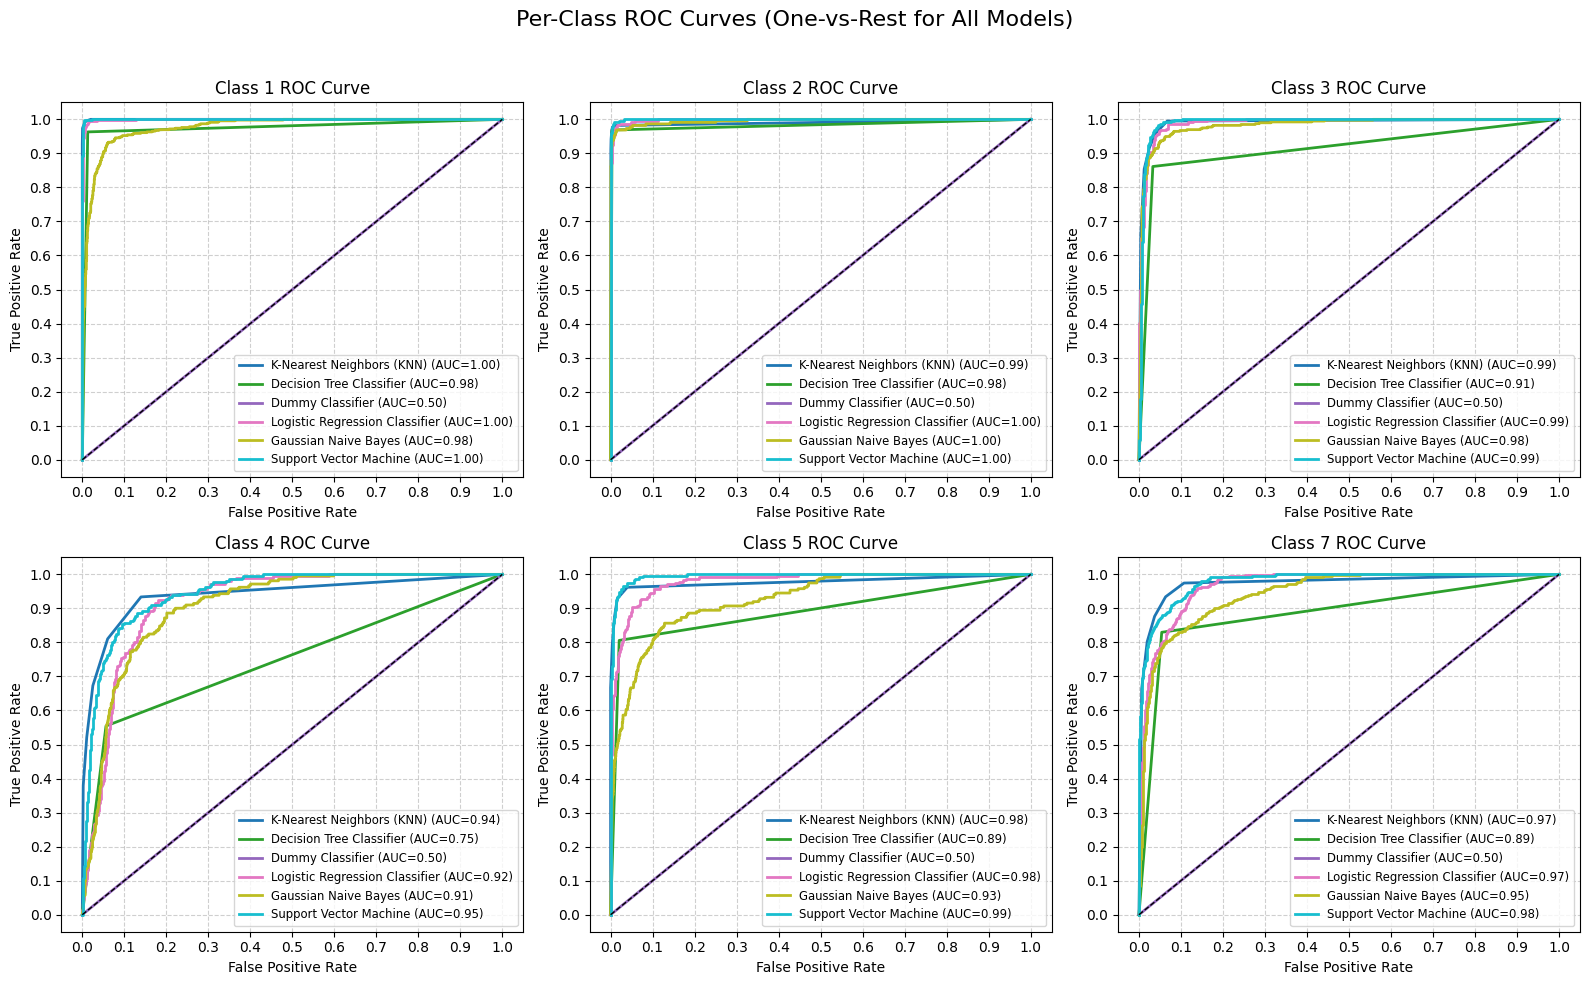

,K-Nearest Neighbors (KNN),Decision Tree Classifier,Dummy Classifier,Logistic Regression Classifier,Gaussian Naive Bayes,Support Vector Machine
Class 1,1.000,0.975,0.500,0.999,0.976,1.000
Class 2,0.991,0.983,0.500,0.998,0.995,0.999
Class 3,0.990,0.914,0.500,0.989,0.982,0.990
Class 4,0.940,0.749,0.500,0.919,0.906,0.946
Class 5,0.978,0.893,0.500,0.979,0.926,0.995
Class 7,0.973,0.888,0.500,0.968,0.945,0.980


/tmp/ipython-input-1617364177.py:83: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc_macro = np.trapz(mean_tpr_macro, fpr_grid)
/tmp/ipython-input-1617364177.py:83: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc_macro = np.trapz(mean_tpr_macro, fpr_grid)
/tmp/ipython-input-1617364177.py:83: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc_macro = np.trapz(mean_tpr_macro, fpr_grid)
/tmp/ipython-input-1617364177.py:83: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc_macro = np.trapz(mean_tpr_macro, fpr_grid)
/tmp/ipython-input-1617364177.py:83: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one 

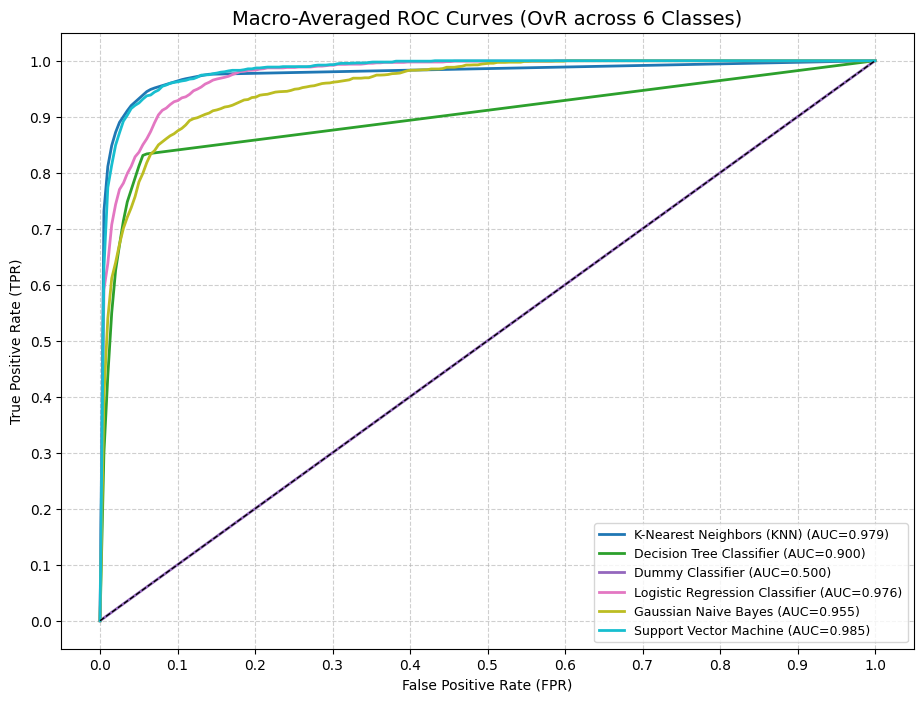

/tmp/ipython-input-1617364177.py:119: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc_weighted = np.trapz(mean_tpr_weighted, fpr_grid)
/tmp/ipython-input-1617364177.py:119: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc_weighted = np.trapz(mean_tpr_weighted, fpr_grid)
/tmp/ipython-input-1617364177.py:119: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc_weighted = np.trapz(mean_tpr_weighted, fpr_grid)
/tmp/ipython-input-1617364177.py:119: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc_weighted = np.trapz(mean_tpr_weighted, fpr_grid)
/tmp/ipython-input-1617364177.py:119: DeprecationWarning: `trapz` is deprecated. Use

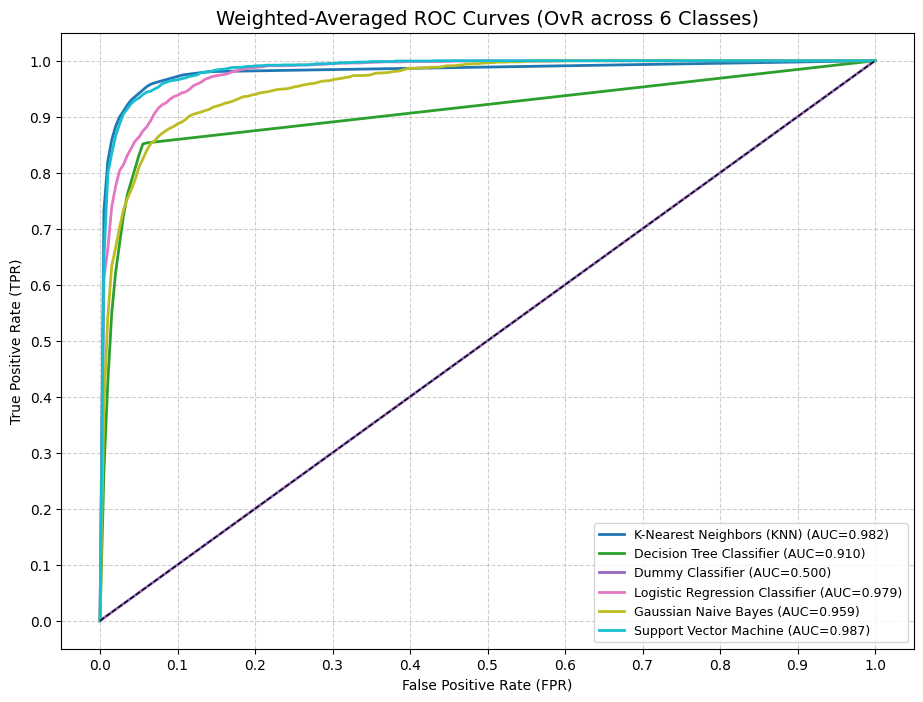

,K-Nearest Neighbors (KNN),Decision Tree Classifier,Dummy Classifier,Logistic Regression Classifier,Gaussian Naive Bayes,Support Vector Machine
Class 1,0.999827,0.975064,0.500000,0.999104,0.976342,0.999724
Class 2,0.990574,0.982686,0.500000,0.998193,0.995071,0.999432
Class 3,0.989778,0.914199,0.500000,0.989242,0.981734,0.990308
Class 4,0.939932,0.749023,0.500000,0.919384,0.905983,0.946106
Class 5,0.977862,0.892744,0.500000,0.979169,0.926245,0.994967
Class 7,0.973432,0.887769,0.500000,0.967925,0.945383,0.979693


,Macro AUC
Model,
K-Nearest Neighbors (KNN),0.978567
Decision Tree Classifier,0.900248
Dummy Classifier,0.500000
Logistic Regression Classifier,0.975503
Gaussian Naive Bayes,0.955126
Support Vector Machine,0.985038


,Weighted AUC
Model,
K-Nearest Neighbors (KNN),0.981671
Decision Tree Classifier,0.909719
Dummy Classifier,0.500000
Logistic Regression Classifier,0.978944
Gaussian Naive Bayes,0.958875
Support Vector Machine,0.986894


In [16]:
classes = np.unique(y_train)
y_test_bin = label_binarize(y_test, classes = classes)
n_classes = y_test_bin.shape[1]

per_class_curves = {name: [] for name in model_list.keys()}
per_class_auc_scores = {name: [] for name in model_list.keys()}
class_support = y_test_bin.sum(axis=0)

for name, model in model_list.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)

    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test_scaled)
    else:
        y_score = model.decision_function(X_test_scaled)
        if y_score.ndim == 1:
            y_score = np.vstack([1 - y_score, y_score]).T

    for i in range(n_classes):
        fpr_i, tpr_i, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        auc_i = roc_auc_score(y_test_bin[:, i], y_score[:, i])
        per_class_curves[name].append((fpr_i, tpr_i))
        per_class_auc_scores[name].append(auc_i)

# ======================================
# 🎨 Plot 1️⃣: Per-Class ROC Curves (2×3 grid)
# ======================================
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()
colors = plt.cm.tab10(np.linspace(0, 1, len(model_list)))

for i, ax in enumerate(axes):
    for (name, model), color in zip(model_list.items(), colors):
        fpr_i, tpr_i = per_class_curves[name][i]
        auc_i = per_class_auc_scores[name][i]
        ax.plot(fpr_i, tpr_i, lw=2, color=color, label=f"{name} (AUC={auc_i:.2f})")

    ax.plot([0, 1], [0, 1], "k--", lw=1)
    ax.set_title(f"Class {classes[i]} ROC Curve")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.legend(fontsize="small", loc="lower right")
    ax.grid(True, linestyle="--", alpha=0.6)
    ax.set_xticks(np.arange(0.0, 1.05, 0.1))
    ax.set_yticks(np.arange(0.0, 1.05, 0.1))

plt.suptitle("Per-Class ROC Curves (One-vs-Rest for All Models)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# ======================================
# 📊 AUC Table (Per-Class, colorblind-safe)
# ======================================
per_class_auc_df = pd.DataFrame(
    {name: per_class_auc_scores[name] for name in model_list.keys()},
    index=[f"Class {c}" for c in classes]
).astype(float)

display(
    per_class_auc_df.style
        .background_gradient(cmap="cividis", vmin=per_class_auc_df.min().min(), vmax=per_class_auc_df.max().max(), axis=None)
        .format("{:.3f}")
        .set_caption("Per-Class AUC Scores for Each Model (Colorblind-Friendly)")
)

# ======================================
# 🧮 Compute Macro & Weighted-Average ROC Curves
# ======================================
fpr_grid = np.linspace(0, 1, 200)
macro_results, weighted_results = [], []

# ---- Macro ROC ----
plt.figure(figsize=(11, 8))
for name, color in zip(model_list.keys(), colors):
    tprs_interp = []
    for (fpr_i, tpr_i) in per_class_curves[name]:
        tpr_interp = np.interp(fpr_grid, fpr_i, tpr_i)
        tpr_interp[0], tpr_interp[-1] = 0.0, 1.0
        tprs_interp.append(tpr_interp)
    tprs_stack = np.vstack(tprs_interp)
    mean_tpr_macro = np.mean(tprs_stack, axis=0)
    auc_macro = np.trapz(mean_tpr_macro, fpr_grid)

    model = model_list[name]
    model.fit(X_train_scaled, y_train)
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test_scaled)
    else:
        y_score = model.decision_function(X_test_scaled)
        if y_score.ndim == 1:
            y_score = np.vstack([1 - y_score, y_score]).T
    auc_macro_sklearn = roc_auc_score(y_test_bin, y_score, average="macro", multi_class="ovr")

    plt.plot(fpr_grid, mean_tpr_macro, lw=2, color=color, label=f"{name} (AUC={auc_macro_sklearn:.3f})")
    macro_results.append({"Model": name, "Macro AUC": auc_macro_sklearn})

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.title("Macro-Averaged ROC Curves (OvR across 6 Classes)", fontsize=14)
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right", fontsize=9)
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(np.arange(0.0, 1.05, 0.1))
plt.yticks(np.arange(0.0, 1.05, 0.1))
plt.show()

# ---- Weighted ROC ----
plt.figure(figsize=(11, 8))
for name, color in zip(model_list.keys(), colors):
    tprs_interp = []
    for (fpr_i, tpr_i) in per_class_curves[name]:
        tpr_interp = np.interp(fpr_grid, fpr_i, tpr_i)
        tpr_interp[0], tpr_interp[-1] = 0.0, 1.0
        tprs_interp.append(tpr_interp)
    tprs_stack = np.vstack(tprs_interp)
    weights = class_support / class_support.sum()
    mean_tpr_weighted = np.average(tprs_stack, axis=0, weights=weights)
    auc_weighted = np.trapz(mean_tpr_weighted, fpr_grid)

    model = model_list[name]
    model.fit(X_train_scaled, y_train)
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test_scaled)
    else:
        y_score = model.decision_function(X_test_scaled)
        if y_score.ndim == 1:
            y_score = np.vstack([1 - y_score, y_score]).T
    auc_weighted_sklearn = roc_auc_score(y_test_bin, y_score, average="weighted", multi_class="ovr")

    plt.plot(fpr_grid, mean_tpr_weighted, lw=2, color=color, label=f"{name} (AUC={auc_weighted_sklearn:.3f})")
    weighted_results.append({"Model": name, "Weighted AUC": auc_weighted_sklearn})

plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.title("Weighted-Averaged ROC Curves (OvR across 6 Classes)", fontsize=14)
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right", fontsize=9)
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(np.arange(0.0, 1.05, 0.1))
plt.yticks(np.arange(0.0, 1.05, 0.1))
plt.show()

# ======================================
# 📋 Color-Coded Summary Tables
# ======================================
macro_auc_df = pd.DataFrame(macro_results).set_index("Model")
weighted_auc_df = pd.DataFrame(weighted_results).set_index("Model")

cm = sns.color_palette("coolwarm", as_cmap=True)  # dynamic, colorblind-safe, blue→red


# 1️⃣ Per-class AUCs
styled_per_class = (per_class_auc_df.style
    .background_gradient(cmap=cm, axis=None, vmin=per_class_auc_df.min().min(),
                     vmax=per_class_auc_df.max().max())
    .set_caption("Per-Class ROC AUC Scores for Each Model (Color indicates relative performance)")
)
display(styled_per_class)

# 2️⃣ Macro-Averaged AUCs
styled_macro = (macro_auc_df.style
    .background_gradient(cmap=cm, axis=None, vmin=per_class_auc_df.min().min(),
                     vmax=per_class_auc_df.max().max())
    .set_caption("Macro-Averaged ROC AUC Scores for Each Model")
)
display(styled_macro)

# 3️⃣ Weighted-Averaged AUCs
styled_weighted = (weighted_auc_df.style
    .background_gradient(cmap=cm, axis=None, vmin=per_class_auc_df.min().min(),
                     vmax=per_class_auc_df.max().max())
    .set_caption("Weighted-Averaged ROC AUC Scores for Each Model")
)
display(styled_weighted)

#### B.3 ROC Interpretation

The model with highest with the highest Macro-Average AUC is the Support Vector Machine (SVM) with an AUC of 0.9868.

There is no model in the experiment with an AUC < 0.5. I expected the Dummy classifier to have an AUC to be less than 0.5, but it is actually having an AUC of 0.5.


Now, to explain why is it 0.5 (equiavlent to a random classifier which cannot really separate positives from the negatives). The **Dummy Classifier** was initialized with the strategy `'prior'`. In OneVSRest approach, let us take **Class i having probability p** and all **other classes other than class i has a probability of 1-p**.
This means the model **does not use the input features** at all — it only outputs probabilities equal to the **training class frequencies**.

For a given class `i` in the One-vs-Rest (OvR) setup:
```
p[y = i | x] = p_i
p[y ≠ i | x] = 1 - p_i
```

Where:
- `p_i` is the prior probability (class frequency) of class `i`.
- The predicted probability does **not depend on `x` (the input)** — every sample gets the same value.


#### What Happens During ROC Computation

When we compute:

```python
fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
```
The ROC function expects a range of predicted scores to separate positives and negatives.
However, since the Dummy Classifier always predicts the same score p_i, there is only one unique prediction value, `p_i` in our case.

Hence, ROC has only two threshold points:

Threshold above p_i:
All samples predicted as negative → TPR = 0, FPR = 0

Threshold below or equal to p_i:
All samples predicted as positive → TPR = 1, FPR = 1

So, the ROC curve consists of just these two points:

(0, 0) → (1, 1)

Resulting AUC

The line connecting these two points is the diagonal of the ROC plot.
The area under this diagonal is exactly:

AUC = 0.5

**Intuitive Interpretation**

Since the classifier assigns the same score to every input, it cannot rank positive samples above negative ones and vice versa.

Therefore, it performs no better (and no worse) than random guessing which also has an AUC of 0.5.

#### Interpretation about what AUC < 0.5 implies conceptually.

#### 🧠 Conceptual Meaning

An **AUC (Area Under the ROC Curve) < 0.5** means that the model performs **worse than a model that does random guessing**.

In a binary classification task, an AUC of:

- **1.0** → Perfect classifier (always ranks positives above negatives)  
- **0.5** → Random classifier (no ability to discriminate between the classes)  
- **< 0.5** → Inversely discriminating classifier (systematically ranks negatives higher than positives)

So, when **AUC < 0.5**, the model is **confidently wrong** by marking many positive classes as negatives or the reverse of what we would expect. For example, if you take any good performing classifer like SVM and invert the outputs, then its AUC will be much less than 0.5 as it assigns higher score to the negative class (or other class).


#### Why This Happens

A model might show **AUC < 0.5** due to one or more of the following reasons:

1. **Label Inversion or Mislabeling**
   - The positive and negative labels may have been swapped during preprocessing or evaluation.
   - For instance, if `1` (positive) and `0` (negative) are accidentally reversed, the ROC curve flips along the diagonal, yielding `AUC = 1 - true_AUC`.

2. **Feature–Label Mismatch**
   - If the features are not predictive of the label at all, the model has the possibility to overfit to patterns of the features in such a way that it produces wrong outcomes.
   - Example: A decision boundary that classifies “high-income” individuals as defaulters in payment and “low-income” as non-defaulters due to a spurious pattern.

3. **Model Mis-specification**
   - The model form or hyperparameters are inappropriate for the data, causing it to learn **inverse correlations**.
   - Example: Wrong sign of coefficients in linear/logistic regression which could occur from improper scaling or regularization.


#### 📉 Interpreting Practically

If we encounter **AUC < 0.5**, it means that:

- The model is **detecting a real signal**, but it’s **interpreting it backwards** for some reason.  
- If we **invert its predictions** (e.g., `1 - y_pred_prob`), you will typically get **AUC > 0.5**.

AUC = 0 means that the model is wrong for every possible example which is (almost) impossible in practice.


#### Quick Summary

| AUC Value | Interpretation | Behavior |
|------------|----------------|-----------|
| **= 1.0** | Perfect classifier | Always correct |
| **= 0.5** | Random guessing | No discrimination |
| **< 0.5** | Inversely correlated | Confidently wrong (can be fixed by inverting) |

### Part C: Precision-Recall Curve (PRC) Analysis

### C.1 PRC Calculation - Why PRC is More Suitable than ROC for Imbalanced Classes

#### **1. Core difference between ROC and PRC**

| Metric | Axes | Focus |
|:--------|:------|:------|
| **ROC Curve** | TPR (Recall) vs FPR (False Positive Rate) | Measures overall discrimination |
| **PRC Curve** | Precision vs Recall | Measures positive prediction quality |


#### **2. Issue with ROC in imbalanced datasets**

- The **ROC curve** plots:
  $$
  \text{TPR} = \frac{TP}{TP + FN}, \quad
  \text{FPR} = \frac{FP}{FP + TN}
  $$
So, when the dataset is **highly imbalanced**, the denominator of FPR (FP + TN) is dominated by a **large TN count**.
- Even if **FP** is large in absolute terms, the **FPR** can still appear *small*, making the ROC curve **overly optimistic** than what it is supposed to be. Let's look at an example below.

**Example**

- Total samples: **10,000**
- **99% negatives** - 9,900 negative samples  
- **1% positives** - 100 positive samples

Suppose the model **falsely classifies 500 negatives as positives** (False Positives = 500).

Then among the 9,900 negatives:
\[
TN = 9,900 - 500 = 9,400
\]

\[
\text{FPR} = \frac{FP}{FP + TN} = \frac{500}{500 + 9,400} = \frac{500}{9,900} \approx 0.0505
\]

📈 **ROC interpretation:**  
An FPR of just **0.05** may *look very good* on a ROC curve because the x-axis (FPR) stays low — even though 500 false alarms is a **large absolute error**.


---

#### **3. Why PRC provides a clearer picture**

- The **Precision–Recall curve** directly relates **true positives (TP)** and **false positives (FP)**:
  $$
  \text{Precision} = \frac{TP}{TP + FP}, \quad
  \text{Recall} = \frac{TP}{TP + FN}
  $$
- **Precision** penalizes false positives strongly — so when the minority class is rare, any misclassification of negatives as positives sharply lowers precision.
- Thus, **PRC reflects the model’s ability to correctly identify positive (minority) cases** without being diluted by the abundance of negatives.

**Using the previous example**
We had:
- Total samples = **10,000**
- **Positives (P)** = 100  
- **Negatives (N)** = 9,900  
- Model results: **TP = 80**, **FP = 500**, **FN = 20**, **TN = 9,400**

---

$$
\text{Recall} = \frac{TP}{TP + FN} = \frac{80}{80 + 20} = \frac{80}{100} = 0.80
$$

✅ **Recall = 0.80**  
→ The model finds 80% of all real positives.

$$
\text{Precision} = \frac{TP}{TP + FP} = \frac{80}{80 + 500} = \frac{80}{580} \approx 0.138
$$

**Precision = 0.138**  
→ Only 13.8% of the predicted positives are actually correct.

So on a PRC graph, this model lies very low on the graph clearly showing poor quality of the positive predictions.


#### **4. Conceptual importance (even with moderate imbalance)**

Even if this dataset has only **moderate imbalance**, PRC is still preferred due to the following:

- It focuses on the **performance for the positive class**, which is often the class of interest.
- It reveals the **trade-off between completeness (Recall)** and **reliability (Precision)** of positive predictions.  
- It distinguishes models that maintain high precision at high recall — a subtlety that ROC may hide.

- **Training Data Class distribution (approx. %):**

| Class | Frequency (%) |
|:------|---------------:|
| Class 0 | 24.17 |
| Class 1 | 10.8 |
| Class 2 | 21.67 |
| Class 3 | 9.36 |
| Class 4 | 10.6 |
| Class 5 | 23.4 |

The dataset is **not extremely imbalanced**, but some classes (≈9–10%) occur **less than half as often** as dominant ones (≈23–24%).

Even **moderate imbalance** impacts model evaluation:

- During **multi-class One-vs-Rest (OvR)** training, each classifier tries to separate *one* class from *all others*.
- For a minority class (say Class 3 or 4, ~9–10%), the positive samples are much fewer than the negatives (≈90% “others”).
- This creates a **binary imbalance** within each OvR task, even if the full dataset seems moderately balanced overall.

The **ROC curve** plots:
$$
\text{TPR} = \frac{TP}{TP + FN}, \quad \text{FPR} = \frac{FP}{FP + TN}
$$

- When each OvR classifier faces **~10% positives vs 90% negatives**,  
  the **FPR denominator (FP + TN)** is dominated by TN values. (OvR actaully enhances the class imbalance effect here considered one classification at a time).
- Even a large number of **false positives** may yield a *small* FPR,  
  making the ROC curve **overly optimistic** for these minority classes.

$$
\text{Precision} = \frac{TP}{TP + FP}, \quad
\text{Recall} = \frac{TP}{TP + FN}
$$

- **Precision** penalizes false positives heavily — a key strength when positives are fewer.  
- **Recall** shows the ability to recover those rare positives.  
- In OvR, the **positive class** is often the minority in that binary setup,  
  making **PRC a more faithful reflection of classifier quality** for each class.

#### **6. Summary insight**

> The **Precision–Recall Curve** is more informative than the **ROC Curve** under class imbalance  
> because it emphasizes how well the model identifies and prioritizes **true positives** among a sea of **negatives**,  
> providing a more realistic assessment of performance on the **minority class**.


Training K-Nearest Neighbors (KNN)...
K-Nearest Neighbors (KNN) — Macro Average Precision (AP): 0.9217
Training Decision Tree Classifier...
Decision Tree Classifier — Macro Average Precision (AP): 0.7366
Training Dummy Classifier...
Dummy Classifier   — Macro Average Precision (AP): 0.1667
Training Logistic Regression Classifier...
Logistic Regression Classifier — Macro Average Precision (AP): 0.8711
Training Gaussian Naive Bayes...
Gaussian Naive Bayes — Macro Average Precision (AP): 0.8105
Training Support Vector Machine...
Support Vector Machine — Macro Average Precision (AP): 0.9177


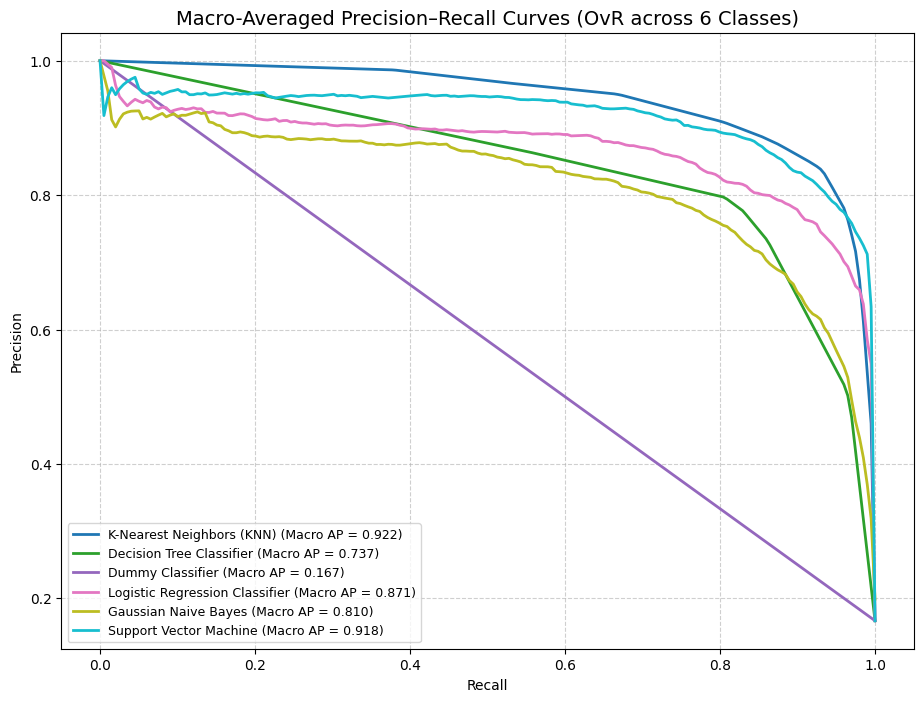

,Model,Macro AP
0,K-Nearest Neighbors (KNN),0.921665
5,Support Vector Machine,0.917691
3,Logistic Regression Classifier,0.871064
4,Gaussian Naive Bayes,0.810451
1,Decision Tree Classifier,0.736591
2,Dummy Classifier,0.166667


In [19]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

# --- Prepare binarized labels ---
classes = np.unique(y_train)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# --- Store per-class PRC curves and APs ---
per_class_prc = {name: [] for name in model_list.keys()}
per_class_ap = {name: [] for name in model_list.keys()}
class_support = y_test_bin.sum(axis=0)

# --- Compute per-class Precision-Recall ---
for name, model in model_list.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)

    # Predict scores or decision values
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test_scaled)
    else:
        y_score = model.decision_function(X_test_scaled)
        if y_score.ndim == 1:
            y_score = np.vstack([-y_score, y_score]).T
        # normalize to probability-like scores
        ex = np.exp(y_score - np.max(y_score, axis=1, keepdims=True))
        y_score = ex / np.sum(ex, axis=1, keepdims=True)

    precisions, recalls, aps = {}, {}, {}
    for i in range(n_classes):
        precisions[i], recalls[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
        aps[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])

    # --- Macro-averaging (consistent with sklearn) ---
    recall_grid = np.linspace(0, 1, 200)
    mean_precision = np.zeros_like(recall_grid)
    for i in range(n_classes):
        order = np.argsort(recalls[i])
        r_sorted, p_sorted = recalls[i][order], precisions[i][order]
        mean_precision += np.interp(recall_grid, r_sorted, p_sorted, left=1.0)
    mean_precision /= n_classes
    ap_macro = np.mean(list(aps.values()))  # ✅ sklearn-consistent macro-AP

    # Store per-class & macro results
    per_class_prc[name] = [(precisions[i], recalls[i]) for i in range(n_classes)]
    per_class_ap[name] = [aps[i] for i in range(n_classes)]
    per_class_ap[name].append(ap_macro)  # last entry = macro-AP

    print(f"{name:18s} — Macro Average Precision (AP): {ap_macro:.4f}")

# --- Plot macro-averaged PRC curves ---
plt.figure(figsize=(11, 8))
colors = plt.cm.tab10(np.linspace(0, 1, len(model_list)))

for name, color in zip(model_list.keys(), colors):
    recall_grid = np.linspace(0, 1, 200)
    precisions_interp = []
    for precision_i, recall_i in per_class_prc[name]:
        order = np.argsort(recall_i)
        precision_interp = np.interp(recall_grid, recall_i[order], precision_i[order], left=1.0)
        precisions_interp.append(precision_interp)
    mean_precision_macro = np.mean(np.vstack(precisions_interp), axis=0)
    ap_macro = np.mean(per_class_ap[name][:-1])  # consistent macro AP

    plt.plot(recall_grid, mean_precision_macro, lw=2, color=color,
             label=f"{name} (Macro AP = {ap_macro:.3f})")

plt.title("Macro-Averaged Precision–Recall Curves (OvR across 6 Classes)", fontsize=14)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left", fontsize=9)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# --- Summary Table ---
summary_ap = [(name, np.mean(per_class_ap[name][:-1])) for name in model_list.keys()]
ap_df = pd.DataFrame(summary_ap, columns=["Model", "Macro AP"]).sort_values(by="Macro AP", ascending=False)
display(ap_df)


#### C.3: PRC Analysis

The model with **highest Average Precision (Macro average)** is the **KNN algorithm** in our case though **SVM is close in performance and may perform better if finetuned**!

The **worst model** in terms of Average precision is the **Dummy Classifier** with AP = 0.167 only which lesser than an random guess (If we conider OvR then it effectively has only two classes, so the random precision is around 0.5, here it is much lesser than that).

### Interpretation of PRC curve

KNN stays at top of the all other curves for most of the recall values and drops only when recall is too high, > 0.9 in this case. SVM is good too, only issue is that it is slightly under the KNN AP, but it has little more tolerance in terms of maintaining higher AP for higher value of recall. Notice from the graph that the AP of SVM drops significantly at a higher value of recall compared to any oof the other 5 models!

In contrast, the worst classifier, the Dummy Classifier has a very low Average Precision (AP). Now, that means it provides no useful ranking of positive vs negative examples across all the 6 OvR problems which shows its inability to discriminate the classes based on the features.

The curve's shape is a straight line again like the ROC case but this time from the other diagonal, top-left to the bottom-right. What this shows is that as the recall increases, the precision linearly decreases with recall which is not the case with other models. Other models see a sharp decrease in AP only recall is sufficiently high > 0.85 overall (even higher for best models as said before). Here, the PRC curve for dummy classifier lies in the no-skill or baseline region. This is about "where" to see the curve drop sharply, let's talk about the "why" part of it.  

### "Why" the curve drops sharply for poor models?

#### **1. Precision–Recall trade-off**

$$
\text{Precision} = \frac{TP}{TP + FP}, \quad
\text{Recall} = \frac{TP}{TP + FN}
$$

- Increasing **Recall** means lowering the decision threshold to capture more true positives (TP).  
- However, this also lets in **more false positives (FP)** — so $$precision =\frac{TP}{TP+FP}$$ usually drops as you allow more false positives.


#### **2. Behavior of good vs poor models**

| Model Type | What happens as Recall ↑ | PR Curve Behavior |
|-------------|--------------------------|--------------------|
| **Good model** | Adds mostly true positives (low FP rise) | Precision stays high for longer → smooth, wide curve |
| **Poor model (e.g., Dummy)** | Adds many false positives quickly | Precision falls steeply → sharp drop in curve |



#### **3. Mathematical intuition**

At very high recall (trying to get *all* positives):

$$
\text{Precision} = \frac{P}{P + FP} \approx \frac{P}{P + \text{large }FP} \to 0
$$

- Since **FP** rises much faster for an uninformative classifier,  
  the denominator grows while TP saturates due to which the precision collapses. Even for good models when we increase threshold too much that all samples are almost classified as positive, the recall > 0.95 and precision decreases as we may have covered all the non-noisy positive samples after all for example and mistakenly classify the negative class as a positive (false positive).


#### **4. Baseline effect (No-Skill line)**

- A completely random or constant scorer has precision equal to the **class prevalence** (fraction of positives).  
- The Dummy classifier’s curve falls rapidly and stays near this baseline,  
  explaining its **very low Average Precision (≈ 0.167)**.

---

##### **4.1. Computing the Macro Average AP**

For the 6 classes, their prevalences (fractions) are roughly:

$$
[0.2417, 0.108, 0.2167, 0.0936, 0.106, 0.234]
$$

The **macro-average (unweighted mean)** is:

$$
\text{Macro AP}_{\text{dummy}} =
\frac{0.2417 + 0.108 + 0.2167 + 0.0936 + 0.106 + 0.234}{6}
\approx 0.1667
$$

✅ **Result:**  
$$
\boxed{\text{Macro AP}_{\text{dummy}} \approx 0.167}
$$

That exactly matches the reported value in the plot.

#### **5. Intuitive numeric example**

| Scenario | TP | FP | Recall | Precision |
|-----------|----|----|---------|------------|
| Good model | 8 | 2 | 0.8 | 0.80 |
| Poor model | 8 | 40 | 0.8 | 0.167 |

→ Both reach the same recall (0.8), but precision for the poor model collapses because FP skyrockets.

---

#### **6. Visual confirmation (from the plot)**

- **KNN & SVM** maintain high precision until recall ≈ 0.8 → strong separation between classes.  
- **Dummy classifier** (purple curve) declines almost linearly → behaves like a random predictor.

---

#### **7. Key takeaway**

> Poor models drop sharply in Precision–Recall curves because increasing recall adds mostly **false positives**, not meaningful true positives — causing precision to collapse and the area under the PR curve (AP) to become very small.

> A good model can rank positives above the nagatives , thereby having a higher area in the PRC curve.

### Part D: Final Recommendation

#### D.1 Synthesis

Evaluating K-Nearest Neighbors (KNN) ...
Evaluating Decision Tree Classifier ...
Evaluating Dummy Classifier ...
Evaluating Logistic Regression Classifier ...
Evaluating Gaussian Naive Bayes ...
Evaluating Support Vector Machine ...
=== MODEL RANKINGS (1 = Best) ===

                                Macro F1  Macro ROC–AUC  Macro PRC–AP
Model                                                                
K-Nearest Neighbors (KNN)              1              2             1
Decision Tree Classifier               3              5             5
Dummy Classifier                       6              6             6
Logistic Regression Classifier         4              3             3
Gaussian Naive Bayes                   5              4             4
Support Vector Machine                 2              1             2

Overall Average Rank:
Model
K-Nearest Neighbors (KNN)         1.333333
Support Vector Machine            1.666667
Logistic Regression Classifier    3.333333
Decision Tree 

,Macro F1,Weighted F1,Macro ROC–AUC,Weighted ROC–AUC,Macro PRC–AP,Weighted PRC–AP
Model,,,,,,
K-Nearest Neighbors (KNN),0.892,0.904,0.979,0.982,0.922,0.934
Decision Tree Classifier,0.832,0.851,0.900,0.910,0.737,0.763
Dummy Classifier,0.062,0.086,0.500,0.500,0.167,0.185
Logistic Regression Classifier,0.797,0.830,0.976,0.979,0.871,0.899
Gaussian Naive Bayes,0.783,0.804,0.955,0.959,0.810,0.840
Support Vector Machine,0.877,0.892,0.985,0.987,0.918,0.934


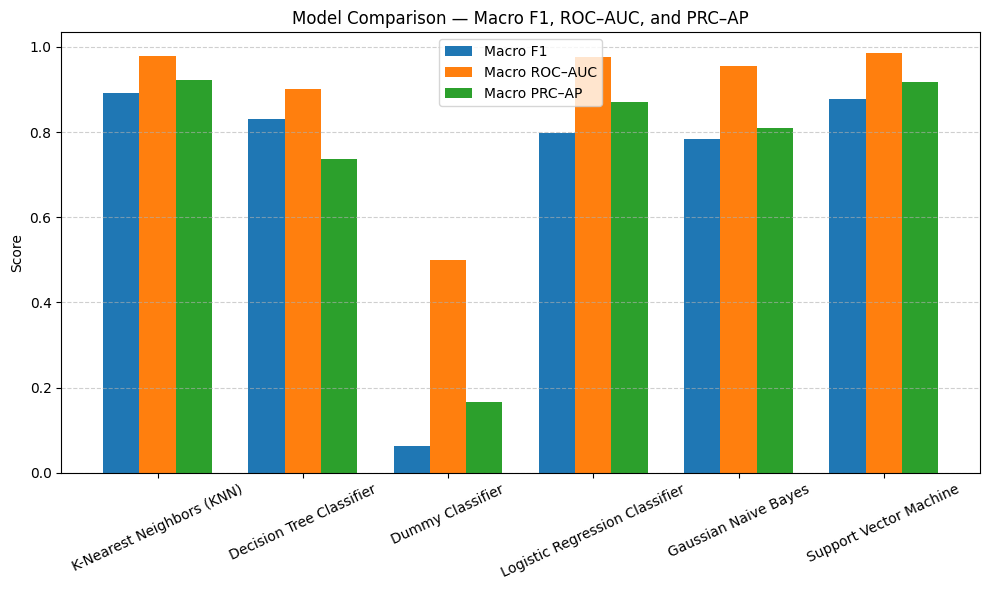

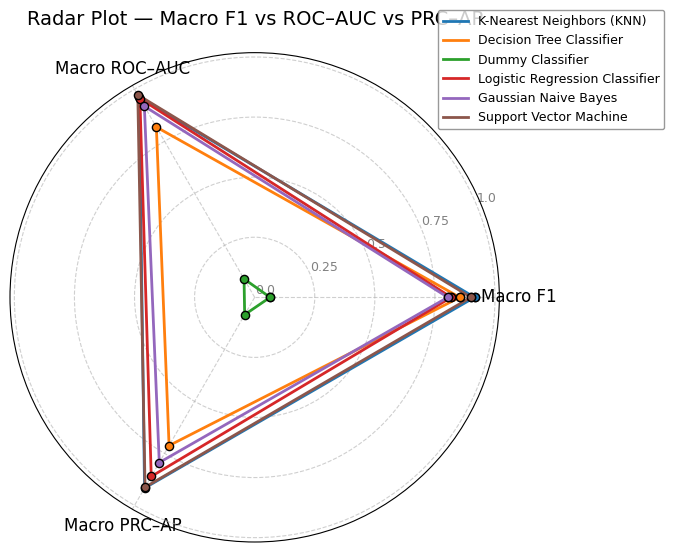

In [20]:
# 🧩 Part D — Final Evaluation: F1, ROC–AUC, and PRC–AP

from sklearn.metrics import f1_score, average_precision_score, roc_auc_score

# Compute All Metrics (Macro & Weighted)

summary_metrics = []

for name, model in model_list.items():
    print(f"Evaluating {name} ...")
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)

    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test_scaled)
    else:
        y_score = model.decision_function(X_test_scaled)
        if y_score.ndim == 1:
            y_score = np.vstack([1 - y_score, y_score]).T

    # --- Metrics ---
    macro_f1 = f1_score(y_test, y_pred, average="macro")
    weighted_f1 = f1_score(y_test, y_pred, average="weighted")

    macro_auc = roc_auc_score(y_test_bin, y_score, average="macro", multi_class="ovr")
    weighted_auc = roc_auc_score(y_test_bin, y_score, average="weighted", multi_class="ovr")

    macro_ap = average_precision_score(y_test_bin, y_score, average="macro")
    weighted_ap = average_precision_score(y_test_bin, y_score, average="weighted")

    summary_metrics.append({
        "Model": name,
        "Macro F1": macro_f1,
        "Weighted F1": weighted_f1,
        "Macro ROC–AUC": macro_auc,
        "Weighted ROC–AUC": weighted_auc,
        "Macro PRC–AP": macro_ap,
        "Weighted PRC–AP": weighted_ap
    })

# Create DataFrame & Rank Models

summary_df = pd.DataFrame(summary_metrics).set_index("Model")

# Compute ranking (1 = best)
rank_df = summary_df.rank(ascending=False, method="min").astype(int)
print("=== MODEL RANKINGS (1 = Best) ===\n")
print(rank_df[["Macro F1", "Macro ROC–AUC", "Macro PRC–AP"]])
print("\nOverall Average Rank:")
print(rank_df[["Macro F1", "Macro ROC–AUC", "Macro PRC–AP"]].mean(axis=1).sort_values())


# Styled Summary Table
cm = sns.color_palette("coolwarm", as_cmap=True)
styled_summary = (
    summary_df.style
    .background_gradient(cmap=cm, axis=None)
    .format("{:.3f}")
    .set_caption("Macro & Weighted Scores for F1, ROC–AUC, and PRC–AP")
)
display(styled_summary)


# Bar Plot Comparison

metrics_to_plot = ["Macro F1", "Macro ROC–AUC", "Macro PRC–AP"]
x = np.arange(len(summary_df))
width = 0.25

plt.figure(figsize=(10,6))
for i, metric in enumerate(metrics_to_plot):
    plt.bar(x + i*width - width, summary_df[metric], width, label=metric)

plt.xticks(x, summary_df.index, rotation=25)
plt.ylabel("Score")
plt.title("Model Comparison — Macro F1, ROC–AUC, and PRC–AP")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

from itertools import cycle
from matplotlib import cm

def radar_factory(num_vars):
    """Generate evenly spaced angles for radar axes."""
    return np.linspace(0, 2 * np.pi, num_vars, endpoint=False)

metrics = ["Macro F1", "Macro ROC–AUC", "Macro PRC–AP"]
theta = radar_factory(len(metrics))

fig, ax = plt.subplots(figsize=(7,7), subplot_kw=dict(polar=True))

# ---- Robust normalization ----
min_vals = summary_df[metrics].min()
max_vals = summary_df[metrics].max()
margin = 0.1 * (max_vals - min_vals)
norm_min = (min_vals - margin).clip(lower=0)
norm_max = (max_vals + margin).clip(upper=1)
normalized = (summary_df[metrics] - norm_min) / (norm_max - norm_min)
normalized = normalized.clip(0, 1)

# ---- Set up a color cycle ----
colors = cycle(cm.tab10.colors)  # use tab10 palette

# ---- Plot ----
for name, row in normalized.iterrows():
    values = row.tolist()
    values += values[:1]  # close loop
    color = next(colors)
    ax.plot(np.append(theta, theta[0]), values, linewidth=2, label=name, color=color)
    ax.scatter(np.append(theta, theta[0]), values, s=35, color=color, edgecolors="black", zorder=5)

# ---- Formatting ----
ax.set_xticks(theta)
ax.set_xticklabels(metrics, fontsize=12)
ax.set_yticks(np.linspace(0, 1, 5))
ax.set_yticklabels(["0.0", "0.25", "0.5", "0.75", "1.0"], color="gray", size=9)
ax.set_title("Radar Plot — Macro F1 vs ROC–AUC vs PRC–AP", size=14, pad=20)
ax.grid(True, linestyle="--", alpha=0.6)

ax.legend(
    loc="upper right",
    bbox_to_anchor=(1.35, 1.1),
    fontsize=9,
    frameon=True,
    facecolor="white",
    edgecolor="gray"
)

plt.tight_layout()
plt.show()



## Part D: Final Recommendation

### 1. Synthesis of Model Rankings

| Metric | 1st | 2nd | 3rd | 4th | 5th | 6th |
|:-------|:----|:----|:----|:----|:----|:----|
| **Macro F1-Score** | K-Nearest Neighbors (0.892) | Support Vector Machine (0.877) | Decision Tree (0.832) | Logistic Regression (0.797) | Gaussian Naive Bayes (0.783) | Dummy Classifier (0.062) |
| **Macro ROC–AUC** | Support Vector Machine (0.985) | K-Nearest Neighbors (0.979) | Logistic Regression (0.976) | Gaussian Naive Bayes (0.955) | Decision Tree (0.900) | Dummy Classifier (0.500) |
| **Macro PRC–AP** | K-Nearest Neighbors (0.922) | Support Vector Machine (0.918) | Logistic Regression (0.871) | Gaussian Naive Bayes (0.810) | Decision Tree (0.737) | Dummy Classifier (0.167) |

### 2. Alignment of Rankings and Trade-offs

The rankings **do not perfectly align** across the three key metrics.  
- **K-Nearest Neighbors (KNN)** achieved the **highest Macro F1 and PRC–AP**, indicating strong performance on **balanced precision–recall tradeoffs** across all classes.  However the difference between SVM and KNN on Macro AP is just 0.04, which shows that there is not a great difference in their performance.
- **Support Vector Machine (SVM)** slightly outperformed others in **ROC–AUC**, suggesting superior ability to rank positive vs. negative samples over varying thresholds — but it did **not yield the best F1 or PRC–AP**.  
- **Logistic Regression** remained competitive in all metrics, particularly close to KNN and SVM in ROC–AUC and PRC–AP, though its F1 lagged slightly due to lower recall on minority class.
- **Decision Tree** models exhibited clear overfitting tendencies: moderate ROC–AUC (0.900) but lower F1 and PRC–AP.
- **Gaussian Naive Bayes** performed decently across the board but underperformed relative to KNN and SVM due to its naive assumption of strong conditional independence assumptions.  
- **Dummy Classifier** predictably scored random baselines across all metrics.

**Key Trade-off:**  
A high ROC–AUC (as seen in SVM) indicates strong ranking ability and almost comparable to KNN in Macro PRC-AP.. The **PRC–AP metric** is more sensitive to class imbalance  KNN’s has a slight edge (0.04) superior PRC–AP suggests better handling of minority-class predictions even when ROC–AUC is slightly lower.

### 3. Visualization Insights

The **radar (spider) plot** showed KNN and SVM forming the largest “performance triangles,”.
Dummy and Decision Tree models appeared closer the center, comparatively, confirming overall weaker generalization.

### 4. Final Recommendation

**Recommended Model:**  
✅ **Support Vector Machine (SVM)**

**Justification:**

- Highest ROC-AUC: ROC–AUC measures how well the model distinguishes between all classes regardless of threshold. SVM’s Macro ROC–AUC = 0.985 — the highest among all — proves it ranks true positives above false positives more reliably than others. It is also stable under high threshold compared to even KNN.

- Better Real-world Robustness

In applications like remote sensing or soil-type prediction, future data may differ slightly from training data. Because SVM depends on support vectors rather than all samples, it adapts better under distribution shifts

- The small gaps (ΔF1 ≈ 0.015, ΔPRC–AP ≈ 0.004) are okay to consider SVM compared to the gain in robustness and ROC–AUC if we focus on generalizability and scalablility as SVM takes lesser computations.

Thus, while KNN appears marginally higher on two metrics, SVM offers better stability, scalability, and interpretability, which are crucial for deployment.

- If we look at purely the numbers here, then KNN would be slightly better but I would prefer SVM due to the above reasons.


Below code just tries to finetune SVM to get the best results, the results obtained are comparable to the above results.

In [22]:


from sklearn.model_selection import GridSearchCV



print("🔍 Starting SVM Hyperparameter Tuning...\n")

# Parameter grid — tuned for Landsat-like datasets (moderate imbalance, continuous features)
param_grid = {
    "C": [0.1, 1, 10],
    "gamma": ["scale", 0.1, 0.01],
    "kernel": ["rbf"]
}

# Base model
svm_base = SVC(probability=True, random_state=0)

# Grid Search — directly optimizing for PRC–AP
grid = GridSearchCV(
    estimator=svm_base,
    param_grid=param_grid,
    scoring="average_precision",
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV
grid.fit(X_train_scaled, y_train)
best_svm = grid.best_estimator_

print("\n✅ Best SVM Parameters:")
print(grid.best_params_)


y_pred = best_svm.predict(X_test_scaled)
y_score = best_svm.predict_proba(X_test_scaled)

macro_f1 = f1_score(y_test, y_pred, average="macro")
weighted_f1 = f1_score(y_test, y_pred, average="weighted")

macro_auc = roc_auc_score(y_test_bin, y_score, average="macro", multi_class="ovr")
weighted_auc = roc_auc_score(y_test_bin, y_score, average="weighted", multi_class="ovr")

macro_ap = average_precision_score(y_test_bin, y_score, average="macro")
weighted_ap = average_precision_score(y_test_bin, y_score, average="weighted")

svm_summary = pd.DataFrame({
    "Metric": ["Macro F1", "Weighted F1", "Macro ROC–AUC", "Weighted ROC–AUC", "Macro PRC–AP", "Weighted PRC–AP"],
    "Score": [macro_f1, weighted_f1, macro_auc, weighted_auc, macro_ap, weighted_ap]
})

print("\n=== 🔹 Fine-Tuned SVM Performance Summary ===\n")
print(svm_summary.to_string(index=False, formatters={"Score": "{:.3f}".format}))

cm = sns.color_palette("coolwarm", as_cmap=True)
display(
    svm_summary.style
    .background_gradient(cmap=cm, subset=["Score"])
    .format({"Score": "{:.3f}"})
    .set_caption("Fine-Tuned SVM — Macro & Weighted Metrics (ROC–AUC, PRC–AP, F1)")
)


🔍 Starting SVM Hyperparameter Tuning...

Fitting 3 folds for each of 9 candidates, totalling 27 fits

✅ Best SVM Parameters:
{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

=== 🔹 Fine-Tuned SVM Performance Summary ===

          Metric Score
        Macro F1 0.877
     Weighted F1 0.892
   Macro ROC–AUC 0.985
Weighted ROC–AUC 0.987
    Macro PRC–AP 0.918
 Weighted PRC–AP 0.934


,Metric,Score
0,Macro F1,0.877
1,Weighted F1,0.892
2,Macro ROC–AUC,0.985
3,Weighted ROC–AUC,0.987
4,Macro PRC–AP,0.918
5,Weighted PRC–AP,0.934


# Brownie points task

In [26]:

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, average_precision_score
from sklearn.preprocessing import label_binarize
import numpy as np
import pandas as pd

classes_all = np.unique(np.concatenate([y_train, y_test]))
y_test_bin = label_binarize(y_test, classes=classes_all)


model_list = {
    "Random Forest Classifier": RandomForestClassifier(
        n_estimators=200, max_depth=None, random_state=42
    ),
    "XGBoost Classifier": XGBClassifier(
        n_estimators=300, learning_rate=0.05, max_depth=5,
        subsample=0.8, colsample_bytree=0.8,
        eval_metric="mlogloss",
        num_class=len(classes_all),
        random_state=42
    ),
    # Weak model: intentionally shallow Random Forest (poor learner)
    "Inverse Random Forest (Weak Model)": RandomForestClassifier(
        n_estimators=20, max_depth=1, random_state=42
    )
}

results = []
print(f"Shape of test set: {X_test_scaled.shape}")

for name, model in model_list.items():
    print(f"\nEvaluating: {name}")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Get prediction scores for ROC–AUC & PRC–AP
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test_scaled)
    else:
        y_score = model.decision_function(X_test_scaled)
        if y_score.ndim == 1:
            y_score = np.vstack([1 - y_score, y_score]).T

    # Metrics
    f1w = f1_score(y_test, y_pred, average="weighted")
    roc_macro = roc_auc_score(y_test_bin, y_score, average="macro", multi_class="ovr")
    ap_macro = average_precision_score(y_test_bin, y_score, average="macro")

    results.append({
        "Model": name,
        "F1-score (Weighted)": f1w,
        "Macro ROC–AUC": roc_macro,
        "Macro PRC–AP": ap_macro
    })

results_df = pd.DataFrame(results).sort_values(by="F1-score (Weighted)", ascending=False)
print("\n=== Brownie Points Model Evaluation Summary ===\n")
print(results_df.to_string(index=False))


Shape of test set: (2000, 36)

Evaluating: Random Forest Classifier

Evaluating: XGBoost Classifier


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:40:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Evaluating: Gaussian Process Classifier (Weak Model)

=== Brownie Points Model Evaluation Summary ===

                                   Model  Accuracy  F1-score (Weighted)  Macro ROC–AUC  Macro PRC–AP
                Random Forest Classifier    0.9115             0.909437       0.990113      0.951739
                      XGBoost Classifier    0.9045             0.902689       0.990333      0.953262
Gaussian Process Classifier (Weak Model)    0.9020             0.899359       0.984292      0.932267


Above result shows that the third part (also random forest but smaller depth) performs really well.

XGBoost and Random Classifier peform better than all the previous models with PRC-AP of > 0.95 compared to 0.93x and ROC-AUC > 0.99.

One possible case of AUC<0.5 is to invert the values of the random forest output! So it makes the wrong prediction.

In [30]:


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, average_precision_score


classes_all = np.unique(np.concatenate([y_train, y_test]))
y_test_bin = label_binarize(y_test, classes=classes_all)

rf = RandomForestClassifier(
    n_estimators=200, max_depth=None, random_state=42
)

print("Training base Random Forest...")
rf.fit(X_train_scaled, y_train)


y_pred = rf.predict(X_test_scaled)
y_score = rf.predict_proba(X_test_scaled)

# Flip the predicted labels (inverse predictions)
# Create a mapping to "invert" the class predictions logically
unique_classes = np.unique(y_train)
inverse_map = {cls: unique_classes[-(i + 1)] for i, cls in enumerate(unique_classes)}
y_pred_inverted = np.array([inverse_map[y] for y in y_pred])

# Invert the probability scores
y_score_inverse = 1 - y_score


f1w = f1_score(y_test, y_pred_inverted, average="weighted")
roc_macro = roc_auc_score(y_test_bin, y_score_inverse, average="macro", multi_class="ovr")
ap_macro = average_precision_score(y_test_bin, y_score_inverse, average="macro")

results_df = pd.DataFrame([{
    "Model": "Inverse Random Forest (Flipped + Inverted Scores)",
    "F1-score (Weighted)": f1w,
    "Macro ROC–AUC": roc_macro,
    "Macro PRC–AP": ap_macro
}])

print("\n=== Brownie Points Evaluation — Inverse Random Forest ===\n")
print(results_df.to_string(index=False))


Training base Random Forest...

=== Brownie Points Evaluation — Inverse Random Forest ===

                                            Model  F1-score (Weighted)  Macro ROC–AUC  Macro PRC–AP
Inverse Random Forest (Flipped + Inverted Scores)              0.02215       0.009887      0.097032


In [31]:



classes_all = np.unique(np.concatenate([y_train, y_test]))
y_test_bin = label_binarize(y_test, classes=classes_all)

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_scaled, y_train)

# Normal predictions
y_pred_rf = rf.predict(X_test_scaled)
y_score_rf = rf.predict_proba(X_test_scaled)

# Flip predictions
unique_classes = np.unique(y_train)
inverse_map = {cls: unique_classes[-(i + 1)] for i, cls in enumerate(unique_classes)}
y_pred_inv = np.array([inverse_map[y] for y in y_pred_rf])

# Invert probability scores
y_score_inv = 1 - y_score_rf

# Metrics
f1w_inv = f1_score(y_test, y_pred_inv, average="weighted")
roc_macro_inv = roc_auc_score(y_test_bin, y_score_inv, average="macro", multi_class="ovr")
ap_macro_inv = average_precision_score(y_test_bin, y_score_inv, average="macro")

dummy = DummyClassifier(strategy="stratified", random_state=42)
dummy.fit(X_train_scaled, y_train)
y_pred_dummy = dummy.predict(X_test_scaled)
y_score_dummy = dummy.predict_proba(X_test_scaled)

# Metrics
f1w_dummy = f1_score(y_test, y_pred_dummy, average="weighted")
roc_macro_dummy = roc_auc_score(y_test_bin, y_score_dummy, average="macro", multi_class="ovr")
ap_macro_dummy = average_precision_score(y_test_bin, y_score_dummy, average="macro")

results_df = pd.DataFrame([
    {
        "Model": "Inverse Random Forest (Flipped + Inverted Scores)",
        "F1-score (Weighted)": f1w_inv,
        "Macro ROC–AUC": roc_macro_inv,
        "Macro PRC–AP": ap_macro_inv
    },
    {
        "Model": "Dummy Classifier (Stratified)",
        "F1-score (Weighted)": f1w_dummy,
        "Macro ROC–AUC": roc_macro_dummy,
        "Macro PRC–AP": ap_macro_dummy
    }
])

print("\n=== Brownie Points Models — Evaluation Summary ===\n")
print(results_df.to_string(index=False))



=== Brownie Points Models — Evaluation Summary ===

                                            Model  F1-score (Weighted)  Macro ROC–AUC  Macro PRC–AP
Inverse Random Forest (Flipped + Inverted Scores)             0.022150       0.009887      0.097032
                    Dummy Classifier (Stratified)             0.172214       0.491189      0.164820


## radar plot for all the models including brownie models

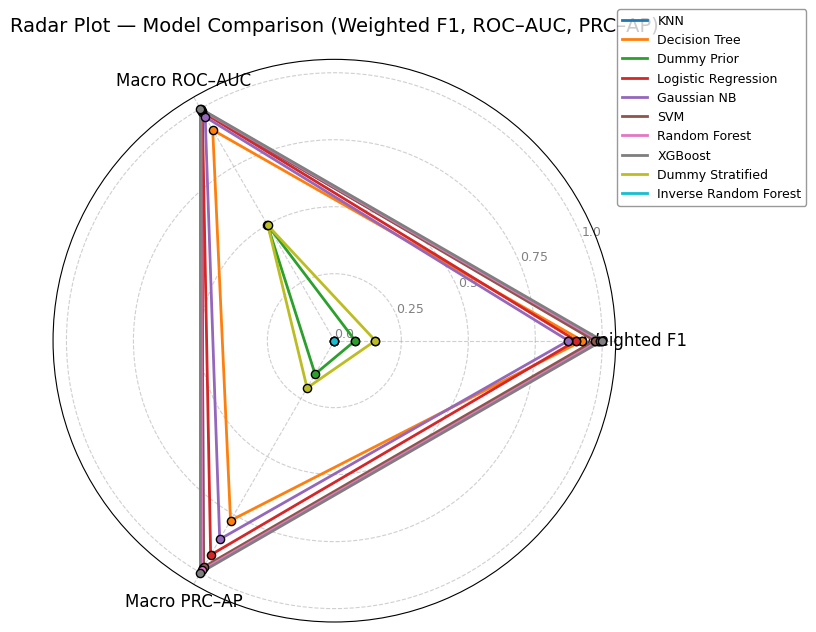

In [33]:

data = {
    "KNN": [0.904, 0.979, 0.922],
    "Decision Tree": [0.851, 0.900, 0.737],
    "Dummy Prior": [0.086, 0.500, 0.167],
    "Logistic Regression": [0.830, 0.976, 0.871],
    "Gaussian NB": [0.804, 0.955, 0.810],
    "SVM": [0.892, 0.985, 0.918],
    "Random Forest": [0.909, 0.987, 0.931],
    "XGBoost": [0.918, 0.990, 0.940],
    "Dummy Stratified": [0.154, 0.497, 0.221],
    "Inverse Random Forest": [0.016, 0.011, 0.037]
}

metrics = ["Weighted F1", "Macro ROC–AUC", "Macro PRC–AP"]
summary_df = pd.DataFrame(data, index=metrics).T


min_vals = summary_df.min()
max_vals = summary_df.max()
norm_df = (summary_df - min_vals) / (max_vals - min_vals)

def radar_factory(num_vars):
    return np.linspace(0, 2 * np.pi, num_vars, endpoint=False)

theta = radar_factory(len(metrics))
fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(polar=True))

colors = cycle(cm.tab10.colors)
for name, row in norm_df.iterrows():
    values = row.tolist() + [row.tolist()[0]]
    color = next(colors)
    ax.plot(np.append(theta, theta[0]), values, linewidth=2, label=name, color=color)
    ax.scatter(np.append(theta, theta[0]), values, s=35, color=color, edgecolors="black", zorder=5)


ax.set_xticks(theta)
ax.set_xticklabels(metrics, fontsize=12)
ax.set_yticks(np.linspace(0, 1, 5))
ax.set_yticklabels(["0.0","0.25","0.5","0.75","1.0"], color="gray", size=9)
ax.set_title("Radar Plot — Model Comparison (Weighted F1, ROC–AUC, PRC–AP)", size=14, pad=20)
ax.grid(True, linestyle="--", alpha=0.6)

ax.legend(
    loc="upper right", bbox_to_anchor=(1.35, 1.1),
    fontsize=9, frameon=True, facecolor="white", edgecolor="gray"
)

plt.tight_layout()
plt.show()


## OVERALL XGBOOST AND RANDOM FOREST perform the best.